In [184]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
import statistics
import math

In [185]:
# scenarioname = "Strategic_Reserve"
# selected_scenarios = ["noSR", "strategic_reserve_7", "strategic_reserve_15"]

# selected_scenarios = ["iteration1", "iteration2","iteration3","iteration4", "iteration5","iteration6","iteration7","iteration8","iteration9","iteration10"]
# selected_scenarios =["LowRES_(2010)","medianRES_(2004)","highRES_(1990)"] 
# scenarioname = "capacitymarket"
# selected_scenarios =["NL-capacity market_no_loans","NL-capacity market_with_loans"]
# scenarioname = "SR_expectations"
# selected_scenarios = ["noSR",  "NL-ExpectingSR", "NL-No_expectingSR"]

# scenarioname = "SR_margin"
# selected_scenarios = ["SR2000M5", "SR2000M10","SR2000M15"] 

# scenarioname = "SR"
# selected_scenarios = ["EOM", "SR1000", "SR1600",  "SR2000M5","SR3000"]

# scenarioname = "CapacityMarketPriceCap"
# selected_scenarios = ["EOM3", "CM26000", "CM75000"]

# scenarioname = "NLSR_noNuclear"

# selected_scenarios = ["CM75000", "CM75000noRES"]
# scenarioname = "NL_CMarketnoRESM"

# selected_scenarios = ["EOM" , "CM40000", "CM60000","CM60000noRES"]
# scenarioname = "NL_CMarketnewData"

# selected_scenarios = ["EOM_S1", "CM40000_S1", "CM60000_S1", "SR1000_S1"]
# scenarioname = "NL_S1_nogas"

selected_scenarios = ["EOM","SR_M10_P1600", "SR_M15_P1600" , "SR_M20_P1600"]
scenarioname = "NL_SRnewData"

# scenarioname = "NL_CMarketnewData2"
# selected_scenarios = ["EOM" , "CM60000","CM60000noRES"]
# scenarioname ="NL_S1"
# selected_scenarios = ["EOM", "EOM_S1","CM60000_S1", "SR1600_S1"]

# scenarioname = "SR_lessNuc"
# selected_scenarios = ["EOM_lessNuc","SRM10" ,  "SRM15", "SRM20"]
capacity_markey_only = True

#selected_scenarios = ["noSR", "Strategic_Reserve_5_1500","Strategic_Reserve_10_1500","Strategic_Reserve_15_1500"]

In [186]:
path_to_results = os.path.join(os.getcwd(), "Scenarios", (scenarioname + ".xlsx"))
path_to_plots = os.path.join(os.getcwd(),  "Scenarios", "Comparison_"+ scenarioname )
if not os.path.exists(path_to_plots):
    os.mkdir(path_to_plots)
    
technology_colors = {
    'Biomass_CHP_wood_pellets_DH': "green",
    "Biomass_CHP_wood_pellets_PH": "greenyellow",
    'Coal PSC': "black",
    "Fuel oil PGT": "gray",
    'Lignite PSC': "darkgoldenrod",
    'CCGT': "indianred",
    'OCGT': "gray",
    'Hydropower_reservoir_medium': "darkcyan",
    'PV_utility_systems': "gold",
    'PV': "gold",
    'PV_residential': "khaki",
    'WTG_onshore': "cornflowerblue",
    "WTG_offshore": "navy",
    "Nuclear": "mediumorchid",
    "Hydropower_ROR": "aquamarine",
    "Lithium_ion_battery": "hotpink",
    "Lithium_ion_battery_charge": "hotpink",
    "Pumped_hydro": "darkcyan",
    "CCGT_CHP_backpressure_DH": "orange",
    "fuel_cell": "gold",
    "electrolyzer": "gray",
    "hydrogen_turbine": "darkred",
    "hydrogen_CHP": "indianred",
    "hydrogen_combined_cycle": "coral"
}
others = {
    'Biomass_CHP_wood_pellets_PH': "greenyellow",
    'Coal PSC': "black",
    "Fuel oil PGT": "gray",
    'Lignite PSC': "darkgoldenrod",
    'CCGT': "indianred",
    'OCGT': "darkred",
    "Pumped_hydro": "darkcyan",
    "CCGT_CHP_backpressure_DH": "orange",
    "Nuclear": "mediumorchid",
    "Hydropower_ROR": "aquamarine"
}    

In [187]:
CM_total_costs_data = pd.read_excel(path_to_results, sheet_name='CM_total_costs', index_col=0) # costs in EUR
VRES_data = pd.read_excel(path_to_results, sheet_name='VRES', index_col=0)
SR_operator_data = pd.read_excel(path_to_results, sheet_name='SR', index_col=0)
CRM_costs_data = pd.read_excel(path_to_results, sheet_name='CRM', index_col=0) # costs in Eur/MWh
CM_capacity_data = pd.read_excel(path_to_results, sheet_name='CM_capacity', index_col=0)
CM_clearing_price_data = pd.read_excel(path_to_results, sheet_name='CM_clearing_price', index_col=0)
ElectricityPrices_data = pd.read_excel(path_to_results, sheet_name='ElectricityPrices', index_col=0)

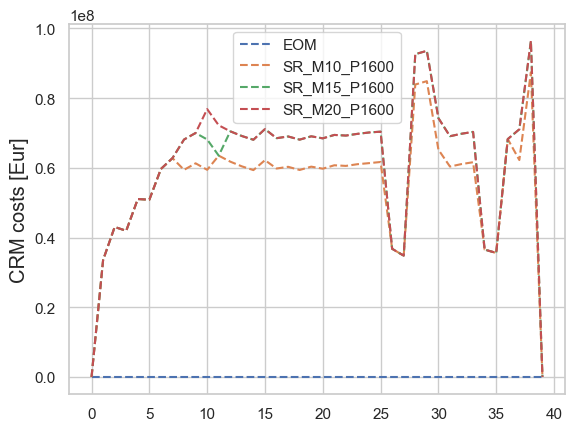

In [188]:
axs1 = CM_total_costs_data.plot(linestyle='dashed')
plt.ylabel('CRM costs [Eur]', fontsize='large')
fig26 = axs1.get_figure()
fig26.savefig(path_to_plots + '/' + 'CRM total costs.png', bbox_inches='tight', dpi=300)

Text(0, 0.5, 'Electricity Prices[Eur/Mwh]')

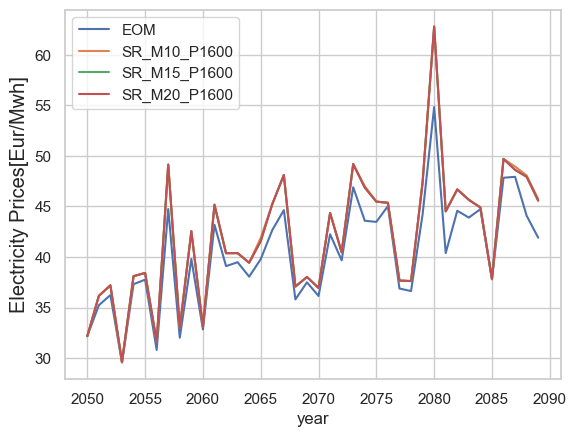

In [189]:
ElectricityPrices_data.plot()
plt.ylabel('Electricity Prices[Eur/Mwh]', fontsize='large')

In [190]:
for column_name, series in ElectricityPrices_data.items():
    if column_name not in SR_operator_data.columns:
        SR_operator_data[column_name] = 0
        
SR_operator_data = SR_operator_data[selected_scenarios]
SR_operator_data.head()

,EOM,SR_M10_P1600,SR_M15_P1600,SR_M20_P1600
0,0,NaN,NaN,NaN
1,0,0.026329,0.026329,0.026329
2,0,0.085411,0.085411,0.085411
3,0,0.000000,0.000000,0.000000
4,0,0.017101,0.017101,0.017101


In [191]:
costs_to_society = pd.DataFrame()
CRM_costs_data.index = ElectricityPrices_data.index

if capacity_markey_only == True: 
    costs_to_society = ElectricityPrices_data  + CRM_costs_data
else:
    SR_operator_data.index = ElectricityPrices_data.index
    costs_to_society = ElectricityPrices_data - SR_operator_data + CRM_costs_data
costs_to_society.head()


,EOM,SR_M10_P1600,SR_M15_P1600,SR_M20_P1600
year,,,,
2050,32.176317,32.176317,32.176317,32.176317
2051,35.233558,36.258222,36.258222,36.258222
2052,36.236375,37.327521,37.327521,37.327521
2053,29.575281,29.725025,29.725025,29.725025
2054,37.313167,38.261363,38.261363,38.261363


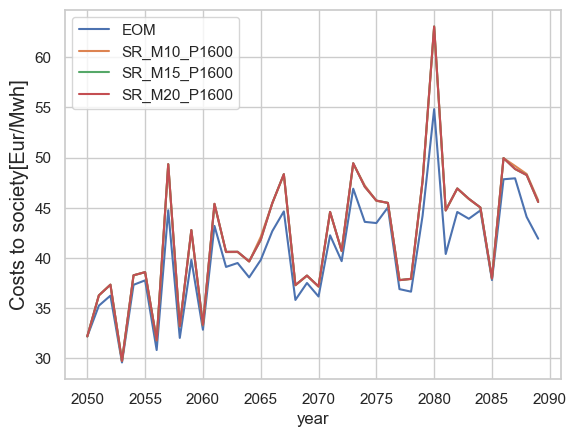

In [192]:
costs_to_society.plot()
axs1 =plt.ylabel('Costs to society[Eur/Mwh]', fontsize='large')
fig2 = axs1.get_figure()
fig2.savefig(path_to_plots + '/' + 'CostsToSociety.png', bbox_inches='tight', dpi=300)

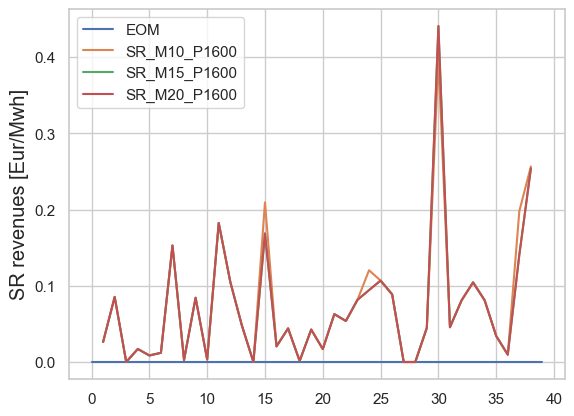

In [193]:
ax1 = SR_operator_data.plot()
plt.ylabel('SR revenues [Eur/Mwh]', fontsize='large')
fig1 = ax1.get_figure()
fig1.savefig(path_to_plots + '/' + 'SR revenues.png', bbox_inches='tight', dpi=300)

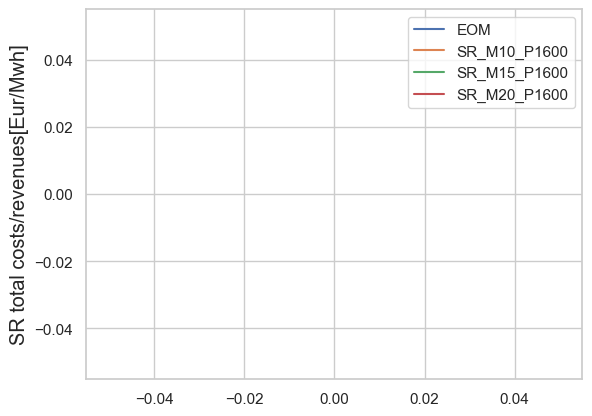

In [194]:
extra_costs = + SR_operator_data  - CRM_costs_data
axs1 = extra_costs.plot()
plt.ylabel('SR total costs/revenues[Eur/Mwh]', fontsize='large')
fig26 = axs1.get_figure()
fig26.savefig(path_to_plots + '/' + 'SRextracosts.png', bbox_inches='tight', dpi=300)

C:\Users\isanchezjimene\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\isanchezjimene\AppData\Local\Temp\ipykernel_9144\2018040473.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


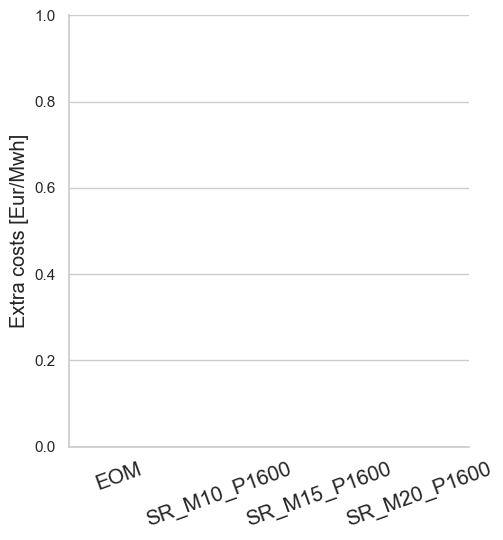

In [195]:
axs1 = sns.catplot( data=pd.melt(extra_costs), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('Extra costs [Eur/Mwh]', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=20, size = 15)
axs1.savefig(path_to_plots + '/' + 'extra_costs.png', bbox_inches='tight', dpi=300)

C:\Users\isanchezjimene\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\isanchezjimene\AppData\Local\Temp\ipykernel_9144\392041037.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


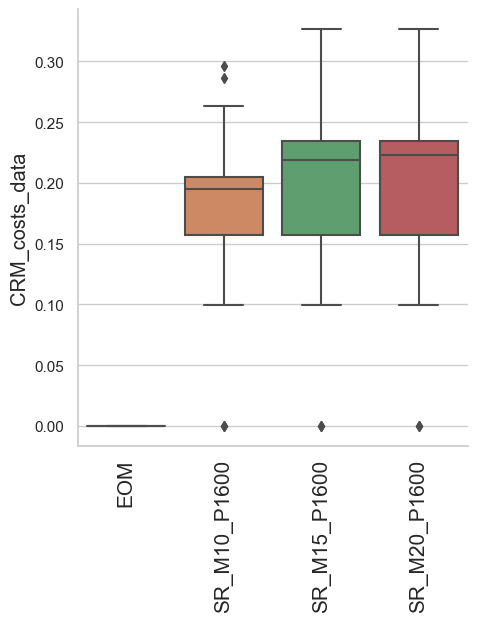

In [196]:

axs1 = sns.catplot( data=pd.melt(CRM_costs_data), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('CRM_costs_data', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)
axs1.savefig(path_to_plots + '/' + 'CRM_costs_data.png', bbox_inches='tight', dpi=300)


In [197]:
if capacity_markey_only ==True:
    pass
else:
    axs1 = sns.catplot( data=pd.melt(+SR_operator_data), x="variable", y="value",  kind="box")
    plt.xlabel('', fontsize='large')
    plt.ylabel('SR revenues ', fontsize='large')
    plt.tight_layout()
    plt.xticks(rotation=90, size = 15)
    axs1.savefig(path_to_plots + '/' + 'SR_revenues.png', bbox_inches='tight', dpi=300)

In [198]:
merged_df = pd.DataFrame()
melted_elecprices = pd.melt(ElectricityPrices_data)

melted_elecprices['description'] = "Wholesale market"
melted_elecprices_withSR = pd.melt(costs_to_society)
melted_elecprices_withSR['description'] = "with CRM costs"
merged_df = pd.concat([melted_elecprices, melted_elecprices_withSR], ignore_index=True)


C:\Users\isanchezjimene\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 100x1000 with 0 Axes>

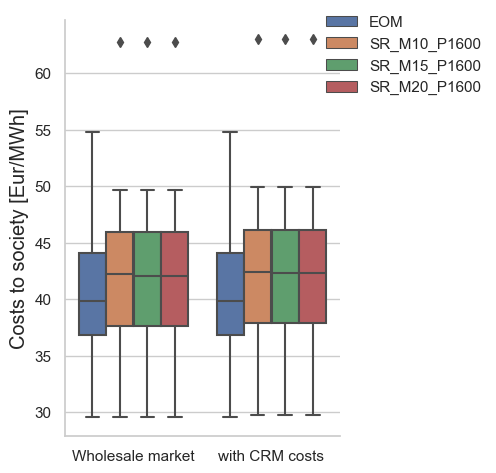

In [199]:
plt.figure(figsize=(1, 10)) 
axs1 = sns.catplot( data=merged_df, x="description", y="value",  kind="box", hue = "variable",  height=5, aspect=0.76)

plt.xlabel('', fontsize='large')
plt.ylabel('Costs to society [Eur/MWh]', fontsize='large')
# plt.tight_layout()
#plt.xticks(rotation=90, size = 15)
sns.move_legend(axs1, "upper center",bbox_to_anchor=(0.8, 1), title=None)

axs1.savefig(path_to_plots + '/' + 'costs_society_withSR.png', bbox_inches='tight', dpi=300)

In [200]:
extra_costs_df = pd.DataFrame()
melted_CRM_costs = pd.melt(-CRM_costs_data)
melted_SR_operator_data= pd.melt(SR_operator_data)
melted_total_costs= pd.melt(extra_costs)

melted_CRM_costs['description'] = "costs"
melted_SR_operator_data['description'] = "revenues"
melted_total_costs['description'] = "total costs"
merged_extra_costs = pd.concat([ melted_CRM_costs, melted_SR_operator_data, melted_total_costs], ignore_index=True)


In [201]:
melted_total_costs.head()

,variable,value,description
0,EOM,NaN,total costs
1,EOM,NaN,total costs
2,EOM,NaN,total costs
3,EOM,NaN,total costs
4,EOM,NaN,total costs


C:\Users\isanchezjimene\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\isanchezjimene\AppData\Local\Temp\ipykernel_9144\1806066510.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


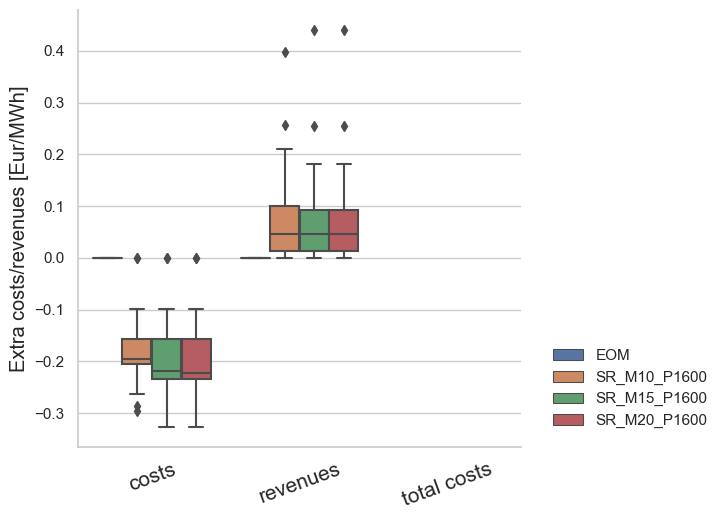

In [202]:

# fig, ax = plt.subplots(figsize=(2, 6))
axs1 =sns.catplot( data=merged_extra_costs, x="description", y="value",  kind="box" ,hue = "variable", 
           height=5, aspect=0.76, legend=True)
plt.xlabel('', fontsize='large')
plt.ylabel('Extra costs/revenues [Eur/MWh]', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=20, size = 15)
sns.move_legend( axs1, "lower left", bbox_to_anchor=(1,0.1), title=None)
#sns.move_legend(axs1, "upper center",bbox_to_anchor=(.5, 1.), title=None)
axs1.savefig(path_to_plots + '/' + 'extra_costs.png', bbox_inches='tight', dpi=300)

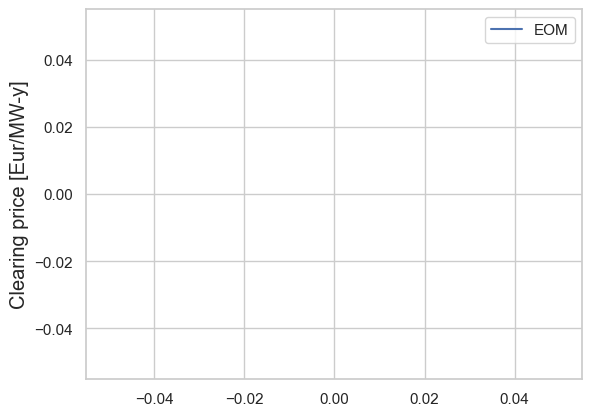

In [203]:
CM_clearing_price_data.plot()
axs1 =plt.ylabel('Clearing price [Eur/MW-y]', fontsize='large')
fig26 = axs1.get_figure()
fig26.savefig(path_to_plots + '/' + 'Clearing Market.png', bbox_inches='tight', dpi=300)

C:\Users\isanchezjimene\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\isanchezjimene\AppData\Local\Temp\ipykernel_9144\1109743656.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


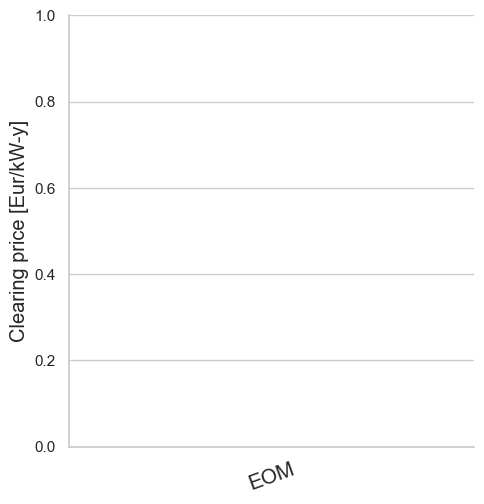

In [204]:
CM_clearing_price_data = CM_clearing_price_data/1000
axs1 = sns.catplot( data=pd.melt(CM_clearing_price_data), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('Clearing price [Eur/kW-y]', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=20, size = 15)
axs1.savefig(path_to_plots + '/' + 'CM_clearing_price_data.png', bbox_inches='tight', dpi=300)
